In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [2]:
path = '/content/sales_predictions - sales_predictions.csv'
df = pd.read_csv(path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.duplicated().sum()

0

In [4]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df.drop(columns=['Item_Weight', 'Outlet_Size', 'Item_Identifier','Outlet_Identifier','Outlet_Type','Outlet_Size', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'],inplace=True)

In [6]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [7]:
df['Item_Fat_Content'].replace({'Low Fat':0, 'LF':0, 'low fat':0, 'Regular':1, 'reg': 1}, inplace=True)
df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [8]:
y = df['Item_Outlet_Sales']
X = df.drop(columns = 'Item_Outlet_Sales')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [11]:
train_scaled = scaler.transform(X_train)
test_scaled = scaler.transform(X_test)
train_scaled[:5]

array([[-0.7403206 , -0.71277507,  1.82810922,  1.32784893],
       [ 1.35076614, -1.29105225,  0.60336888,  1.32784893],
       [ 1.35076614,  1.81331864,  0.24454056,  0.13618724],
       [-0.7403206 , -1.00493112, -0.95259072,  0.73201809],
       [-0.7403206 , -0.96548425, -0.33646004,  0.49368575]])

In [12]:
X_train_scaled = pd.DataFrame(train_scaled, columns=X_train.columns)
X_train_scaled.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,-0.740321,-0.712775,1.828109,1.327849
1,1.350766,-1.291052,0.603369,1.327849
2,1.350766,1.813319,0.244541,0.136187
3,-0.740321,-1.004931,-0.952591,0.732018
4,-0.740321,-0.965484,-0.336460,0.493686


In [13]:
X_train_scaled.describe().round(2)

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,6392.00,6392.00,6392.00,6392.00
mean,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-0.74,-1.29,-1.77,-1.53
25%,-0.74,-0.76,-0.76,-1.29
50%,-0.74,-0.23,0.03,0.14
75%,1.35,0.56,0.72,0.73
max,1.35,5.13,1.99,1.33


In [14]:
reg = LinearRegression()

In [15]:
reg_pipe = make_pipeline(scaler, reg)

In [16]:
reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [17]:
train_pred = reg_pipe.predict(X_train)
test_pred = reg_pipe.predict(X_test)

In [18]:
train_r2 = np.corrcoef(y_train, train_pred)[0][1]**2
test_r2 = np.corrcoef(y_test, test_pred)[0][1]**2

print(f'Model Training R2:{train_r2}')
print(f'Model Testing R2:{test_r2}')

Model Training R2:0.34401686319111674
Model Testing R2:0.3369156698634977


In [19]:
train_RMSE = np.sqrt(np.mean(np.abs(train_pred - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_pred - y_test)**2))

print(f'Model Training RMSE:{train_RMSE}')
print(f'Model Testing RSME:{test_RMSE}')

Model Training RMSE:1393.3244547851282
Model Testing RSME:1353.8540866577325


In [20]:
predictions = reg_pipe.predict(X_test)

In [21]:
prediction_df = X_test.copy()
prediction_df['True Median Price'] = y_test
prediction_df['Predicted Median Price'] = predictions
prediction_df['Error'] = predictions - y_test
prediction_df.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,True Median Price,Predicted Median Price,Error
7503,0,0.026300,79.4302,1987,1743.0644,1549.481767,-193.582633
2957,0,0.071136,42.7086,1997,356.8688,623.143686,266.274886
7031,1,0.041313,42.0454,1999,377.5086,800.565431,423.056831
1084,1,0.044767,173.7054,1985,5778.4782,3042.344564,-2736.133636
856,1,0.012456,197.5110,2004,2356.9320,3284.427177,927.495177


In [22]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [23]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [24]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
-0.1388649664937116


In [25]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [26]:
dec_tree.get_depth()

31

In [27]:
dec_tree.get_n_leaves()

6325

In [28]:
depths = list(range(2, 36))
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
  dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
  dec_tree.fit(X_train, y_train)
  train_score = dec_tree.score(X_train, y_train)
  test_score = dec_tree.score(X_test, y_test)
  scores.loc[depth, 'Train Score'] = train_score
  scores.loc[depth, 'Test Score'] = test_score

Text(0, 0.5, 'R2')

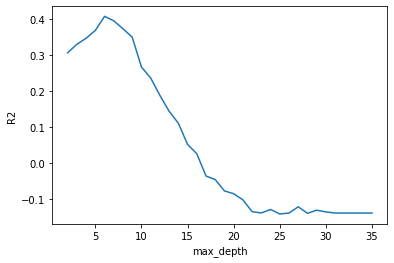

In [29]:
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2')

In [30]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
6,0.406989,0.44452
7,0.394539,0.468038
8,0.372495,0.501864
5,0.367892,0.388483
9,0.349211,0.546864


In [31]:
dec_tree_6 = DecisionTreeRegressor(max_depth = 6, random_state= 42)
dec_tree_6.fit(X_train, y_train)
train_6_score = dec_tree_6.score(X_train, y_train)
test_6_score = dec_tree_6.score(X_test, y_test)
print(train_6_score)
print(test_6_score)

0.4445200336218833
0.40698908212623397


In [32]:
train_r2 = np.corrcoef(y_train, train_pred)[0][1]**2
test_r2 = np.corrcoef(y_test, test_pred)[0][1]**2

print(f'Model Training R2:{train_r2}')
print(f'Model Testing R2:{test_r2}')

Model Training R2:0.34401686319111674
Model Testing R2:0.3369156698634977


In [33]:
train_RMSE = np.sqrt(np.mean(np.abs(train_pred - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_pred - y_test)**2))

print(f'Model Training RMSE:{train_RMSE}')
print(f'Model Testing RSME:{test_RMSE}')

Model Training RMSE:1393.3244547851282
Model Testing RSME:1353.8540866577325


I would recommend the linear regression model because this would show the prevous and predicted growth in sales and would better understand and predict what the sales would look like in the future